Random Forest Regressor Models with HFT with and without the top 10 most commonly used technical indicators

Data Preprocessing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load and clean the dataset
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Define features (X) and target variable (y) for the base model without indicators
X = data_cleaned.drop(columns=['close'])
y = data_cleaned['close']

# Split the data into training and testing sets (keeping the split consistent with XGBoost)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [2]:
# Initialize and train the Random Forest Regressor without any indicators
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 2.748609318948753
R-squared: 0.9735995052929562


SMA

Mean Squared Error: 2.748609318948753
R-squared: 0.9735995052929562
Mean Squared Error with SMA: 2.698093509526576
R-squared with SMA: 0.974095582732269


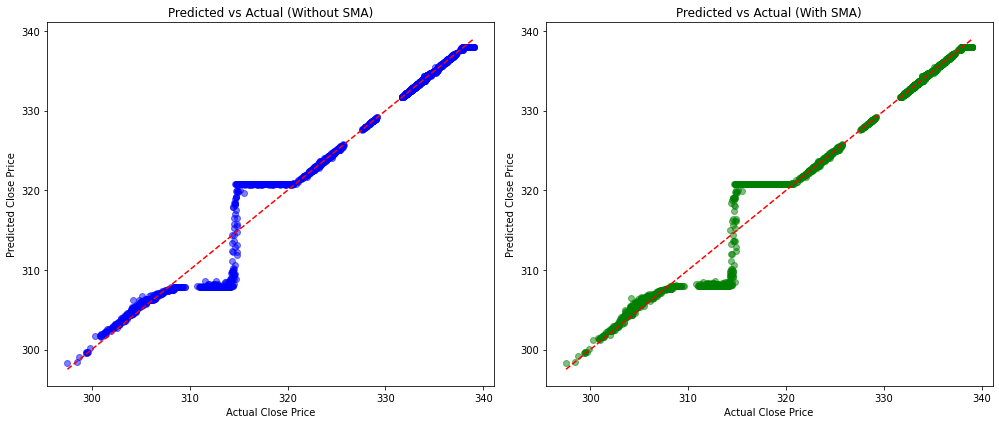

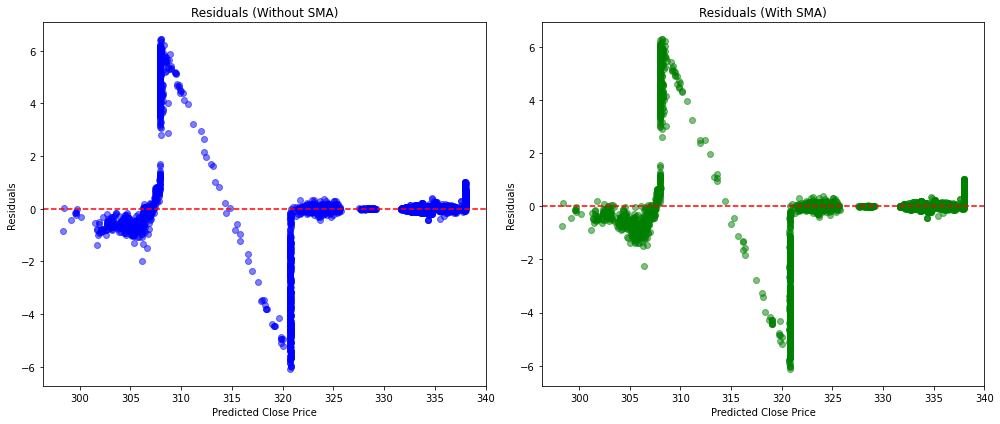

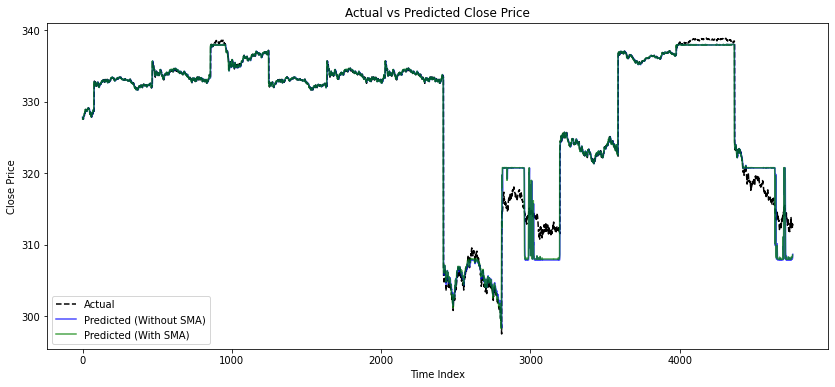

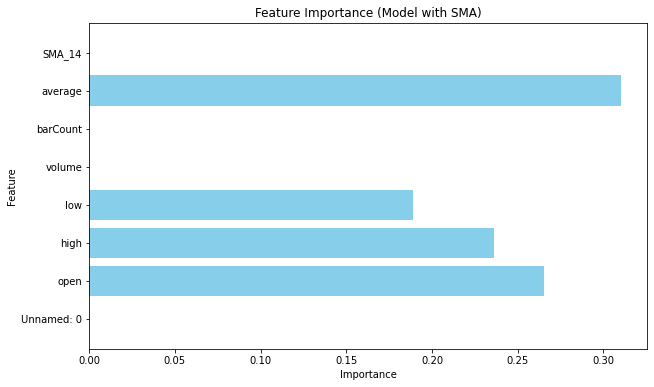

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load and clean the dataset
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Define features (X) and target variable (y) for the base model without indicators
X = data_cleaned.drop(columns=['close'])
y = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Random Forest Regressor without any indicators
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Add SMA to the dataset
data_cleaned['SMA_14'] = data_cleaned['close'].rolling(window=14).mean()
data_cleaned.dropna(inplace=True)

# Define features (X_with_sma) and target variable (y_with_sma)
X_with_sma = data_cleaned.drop(columns=['close'])
y_with_sma = data_cleaned['close']

# Split the data into training and testing sets
X_train_sma, X_test_sma, y_train_sma, y_test_sma = train_test_split(X_with_sma, y_with_sma, test_size=0.2, shuffle=False)

# Train the Random Forest Regressor with SMA
rfr_sma = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_sma.fit(X_train_sma, y_train_sma)
y_pred_sma = rfr_sma.predict(X_test_sma)

# Calculate performance metrics for the model with SMA
mse_sma = mean_squared_error(y_test_sma, y_pred_sma)
r2_sma = r2_score(y_test_sma, y_pred_sma)

print(f'Mean Squared Error with SMA: {mse_sma}')
print(f'R-squared with SMA: {r2_sma}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without SMA
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without SMA)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With SMA
plt.subplot(1, 2, 2)
plt.scatter(y_test_sma, y_pred_sma, alpha=0.5, color='green')
plt.plot([y_test_sma.min(), y_test_sma.max()], [y_test_sma.min(), y_test_sma.max()], '--r')
plt.title('Predicted vs Actual (With SMA)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without SMA
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without SMA)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With SMA
plt.subplot(1, 2, 2)
plt.scatter(y_pred_sma, y_test_sma - y_pred_sma, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With SMA)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without SMA)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_sma)), y_pred_sma, label='Predicted (With SMA)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with SMA
feature_importances = rfr_sma.feature_importances_
features = X_with_sma.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with SMA)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


EMA

Mean Squared Error: 2.748609318948753
R-squared: 0.9735995052929562
Mean Squared Error with EMA: 2.6046587912018095
R-squared with EMA: 0.9749821554643211


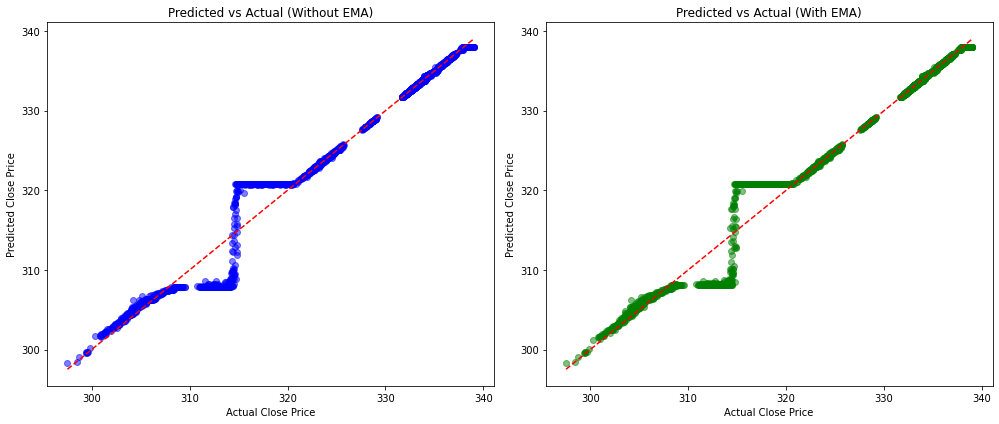

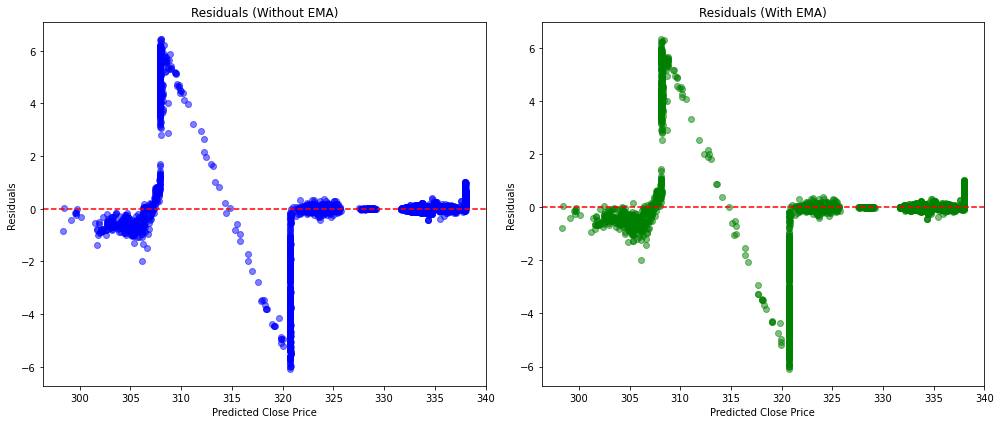

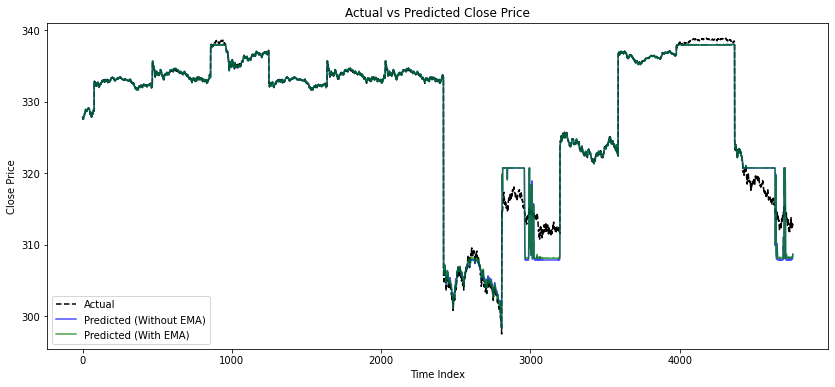

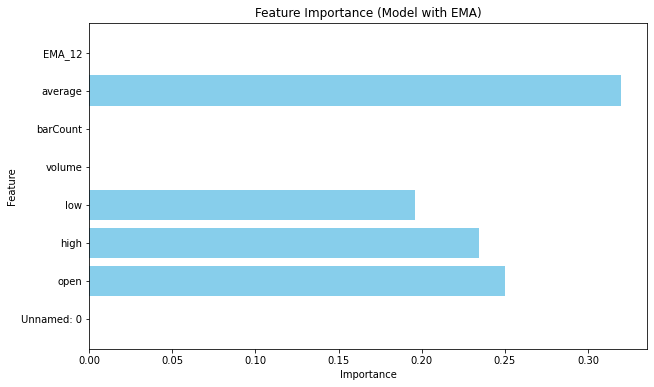

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load and clean the dataset
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Define features (X) and target variable (y) for the base model without indicators
X = data_cleaned.drop(columns=['close'])
y = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Random Forest Regressor without any indicators
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Add EMA to the dataset
data_cleaned['EMA_12'] = data_cleaned['close'].ewm(span=12, adjust=False).mean()
data_cleaned.dropna(inplace=True)

# Define features (X_with_ema) and target variable (y_with_ema)
X_with_ema = data_cleaned.drop(columns=['close'])
y_with_ema = data_cleaned['close']

# Split the data into training and testing sets
X_train_ema, X_test_ema, y_train_ema, y_test_ema = train_test_split(X_with_ema, y_with_ema, test_size=0.2, shuffle=False)

# Train the Random Forest Regressor with EMA
rfr_ema = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_ema.fit(X_train_ema, y_train_ema)
y_pred_ema = rfr_ema.predict(X_test_ema)

# Calculate performance metrics for the model with EMA
mse_ema = mean_squared_error(y_test_ema, y_pred_ema)
r2_ema = r2_score(y_test_ema, y_pred_ema)

print(f'Mean Squared Error with EMA: {mse_ema}')
print(f'R-squared with EMA: {r2_ema}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without EMA
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without EMA)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With EMA
plt.subplot(1, 2, 2)
plt.scatter(y_test_ema, y_pred_ema, alpha=0.5, color='green')
plt.plot([y_test_ema.min(), y_test_ema.max()], [y_test_ema.min(), y_test_ema.max()], '--r')
plt.title('Predicted vs Actual (With EMA)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without EMA
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without EMA)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With EMA
plt.subplot(1, 2, 2)
plt.scatter(y_pred_ema, y_test_ema - y_pred_ema, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With EMA)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without EMA)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_ema)), y_pred_ema, label='Predicted (With EMA)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with EMA
feature_importances = rfr_ema.feature_importances_
features = X_with_ema.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with EMA)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


MACD

Mean Squared Error: 2.748609318948753
R-squared: 0.9735995052929562
Mean Squared Error with MACD: 3.1607334251699606
R-squared with MACD: 0.9696410379291407


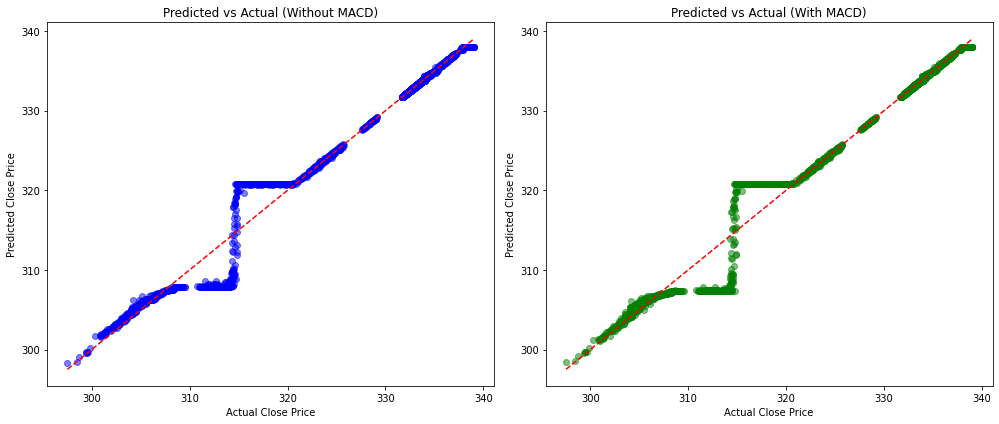

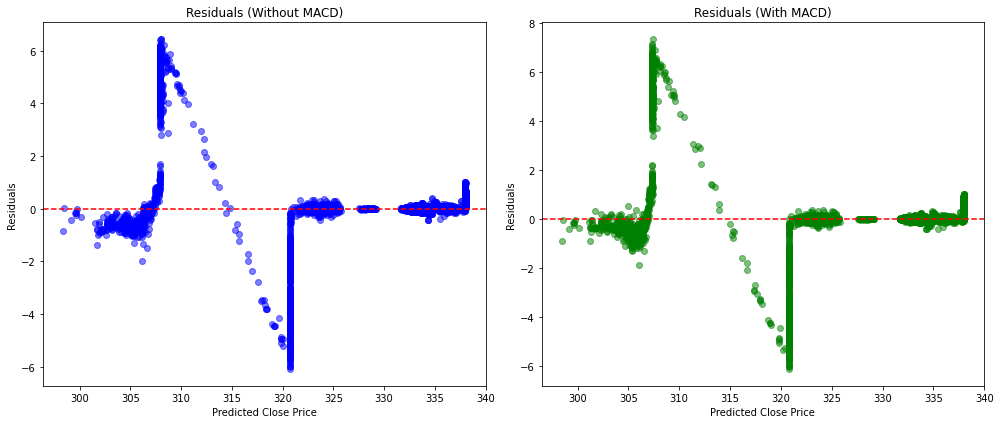

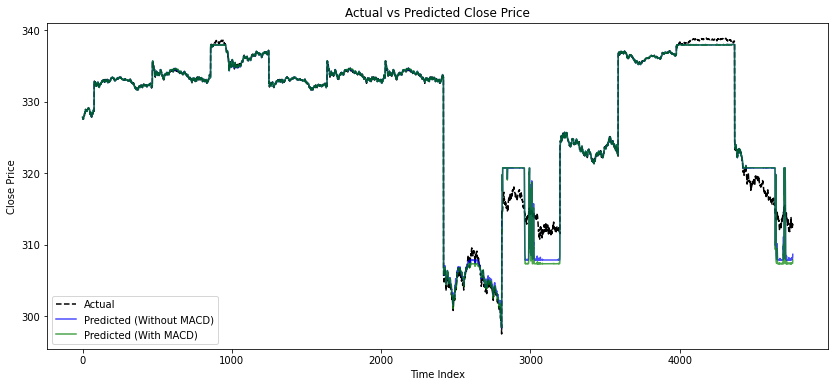

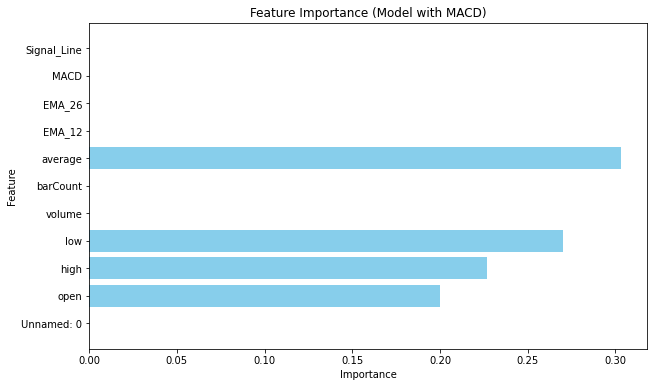

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load and clean the dataset
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Define features (X) and target variable (y) for the base model without indicators
X = data_cleaned.drop(columns=['close'])
y = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Random Forest Regressor without any indicators
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Calculate the MACD and Signal Line
data_cleaned['EMA_12'] = data_cleaned['close'].ewm(span=12, adjust=False).mean()
data_cleaned['EMA_26'] = data_cleaned['close'].ewm(span=26, adjust=False).mean()
data_cleaned['MACD'] = data_cleaned['EMA_12'] - data_cleaned['EMA_26']
data_cleaned['Signal_Line'] = data_cleaned['MACD'].ewm(span=9, adjust=False).mean()
data_cleaned.dropna(inplace=True)

# Define features (X_with_macd) and target variable (y_with_macd)
X_with_macd = data_cleaned.drop(columns=['close'])
y_with_macd = data_cleaned['close']

# Split the data into training and testing sets
X_train_macd, X_test_macd, y_train_macd, y_test_macd = train_test_split(X_with_macd, y_with_macd, test_size=0.2, shuffle=False)

# Train the Random Forest Regressor with MACD and Signal Line
rfr_macd = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_macd.fit(X_train_macd, y_train_macd)
y_pred_macd = rfr_macd.predict(X_test_macd)

# Calculate performance metrics for the model with MACD
mse_macd = mean_squared_error(y_test_macd, y_pred_macd)
r2_macd = r2_score(y_test_macd, y_pred_macd)

print(f'Mean Squared Error with MACD: {mse_macd}')
print(f'R-squared with MACD: {r2_macd}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without MACD
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without MACD)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With MACD
plt.subplot(1, 2, 2)
plt.scatter(y_test_macd, y_pred_macd, alpha=0.5, color='green')
plt.plot([y_test_macd.min(), y_test_macd.max()], [y_test_macd.min(), y_test_macd.max()], '--r')
plt.title('Predicted vs Actual (With MACD)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without MACD
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without MACD)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With MACD
plt.subplot(1, 2, 2)
plt.scatter(y_pred_macd, y_test_macd - y_pred_macd, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With MACD)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without MACD)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_macd)), y_pred_macd, label='Predicted (With MACD)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with MACD
feature_importances = rfr_macd.feature_importances_
features = X_with_macd.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with MACD)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


RSI

Mean Squared Error: 2.748609318948753
R-squared: 0.9735995052929562
Mean Squared Error with RSI: 2.8527087303085343
R-squared with RSI: 0.9725996265762308


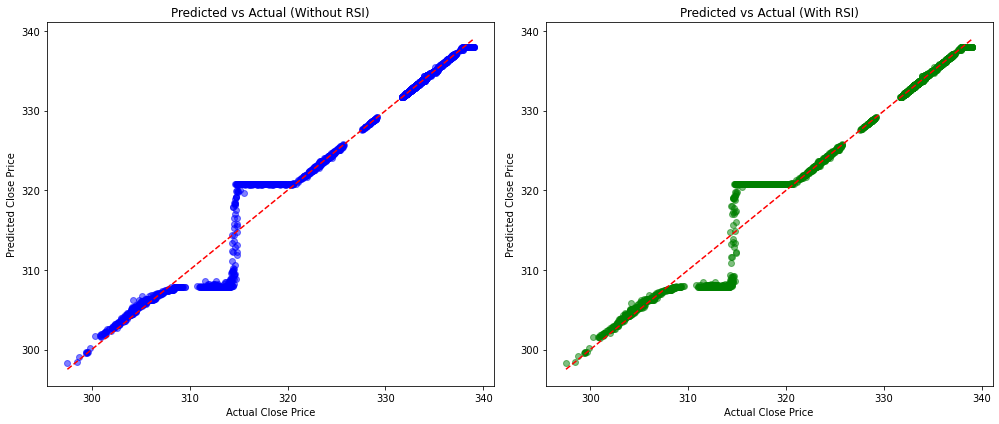

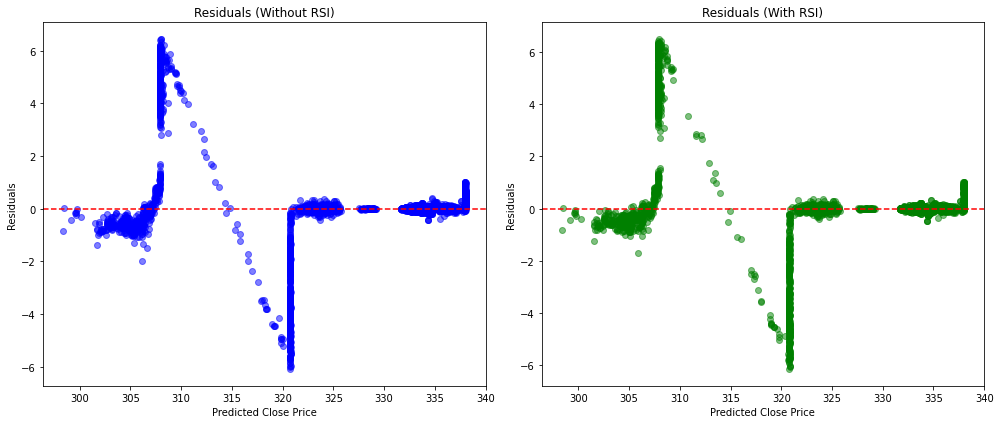

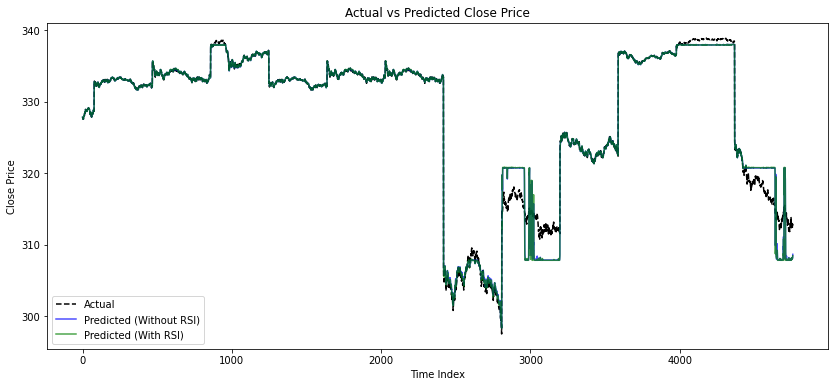

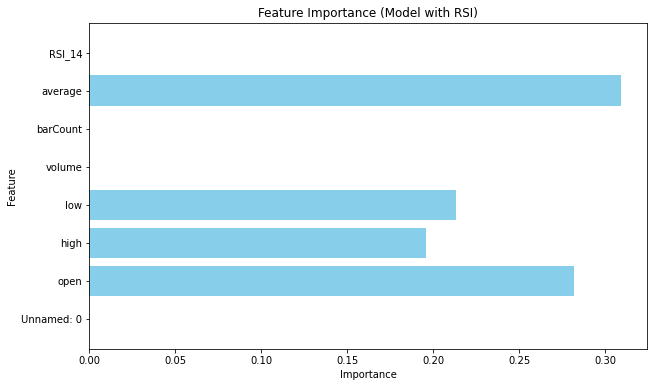

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load and clean the dataset
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Define features (X) and target variable (y) for the base model without indicators
X = data_cleaned.drop(columns=['close'])
y = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Random Forest Regressor without any indicators
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Calculate the RSI
def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data_cleaned['RSI_14'] = calculate_rsi(data_cleaned['close'])
data_cleaned.dropna(inplace=True)

# Define features (X_with_rsi) and target variable (y_with_rsi)
X_with_rsi = data_cleaned.drop(columns=['close'])
y_with_rsi = data_cleaned['close']

# Split the data into training and testing sets
X_train_rsi, X_test_rsi, y_train_rsi, y_test_rsi = train_test_split(X_with_rsi, y_with_rsi, test_size=0.2, shuffle=False)

# Train the Random Forest Regressor with RSI
rfr_rsi = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_rsi.fit(X_train_rsi, y_train_rsi)
y_pred_rsi = rfr_rsi.predict(X_test_rsi)

# Calculate performance metrics for the model with RSI
mse_rsi = mean_squared_error(y_test_rsi, y_pred_rsi)
r2_rsi = r2_score(y_test_rsi, y_pred_rsi)

print(f'Mean Squared Error with RSI: {mse_rsi}')
print(f'R-squared with RSI: {r2_rsi}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without RSI
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without RSI)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With RSI
plt.subplot(1, 2, 2)
plt.scatter(y_test_rsi, y_pred_rsi, alpha=0.5, color='green')
plt.plot([y_test_rsi.min(), y_test_rsi.max()], [y_test_rsi.min(), y_test_rsi.max()], '--r')
plt.title('Predicted vs Actual (With RSI)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without RSI
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without RSI)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With RSI
plt.subplot(1, 2, 2)
plt.scatter(y_pred_rsi, y_test_rsi - y_pred_rsi, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With RSI)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without RSI)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_rsi)), y_pred_rsi, label='Predicted (With RSI)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with RSI
feature_importances = rfr_rsi.feature_importances_
features = X_with_rsi.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with RSI)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Bollinger Bands

Mean Squared Error: 2.748609318948753
R-squared: 0.9735995052929562
Mean Squared Error with Bollinger Bands: 2.7102810350616537
R-squared with Bollinger Bands: 0.9739840231192337


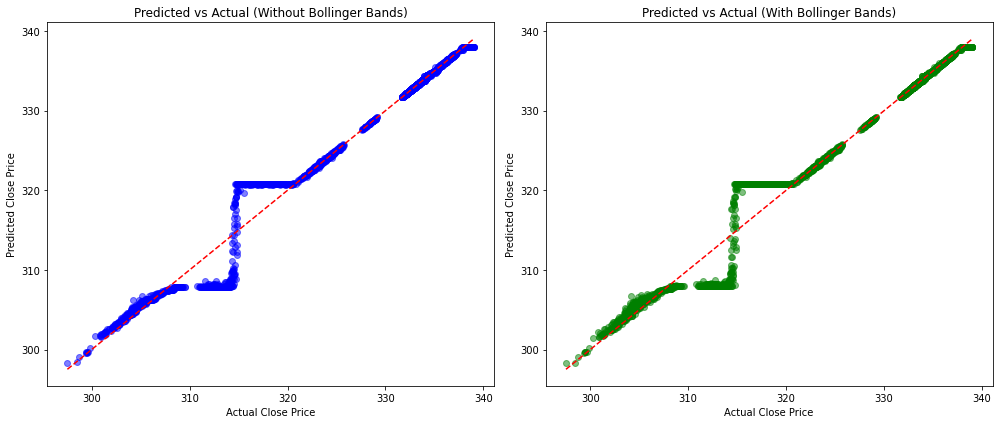

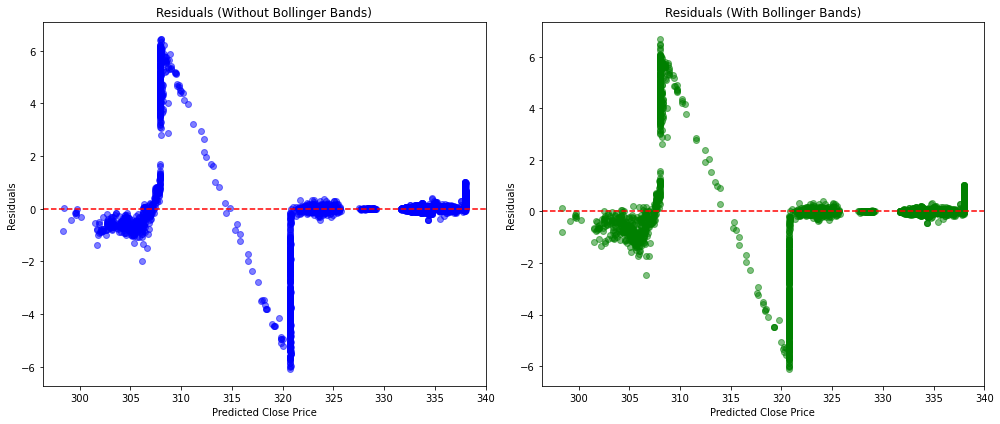

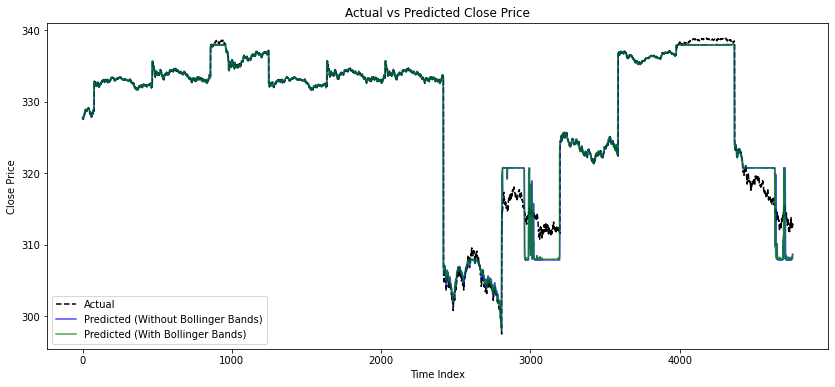

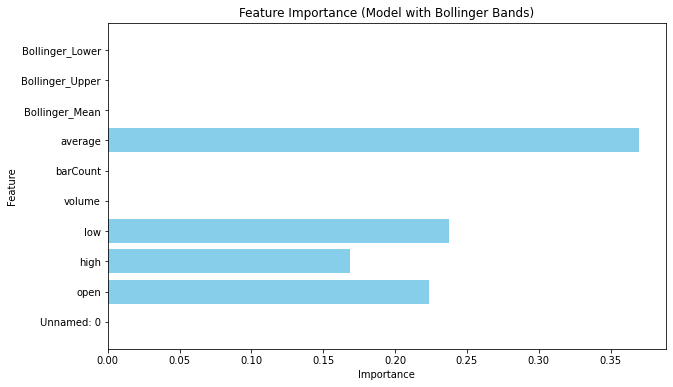

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load and clean the dataset
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Define features (X) and target variable (y) for the base model without indicators
X = data_cleaned.drop(columns=['close'])
y = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Random Forest Regressor without any indicators
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Calculate the Bollinger Bands
def calculate_bollinger_bands(series, window=20, num_std_dev=2):
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    return rolling_mean, upper_band, lower_band

data_cleaned['Bollinger_Mean'], data_cleaned['Bollinger_Upper'], data_cleaned['Bollinger_Lower'] = calculate_bollinger_bands(data_cleaned['close'])
data_cleaned.dropna(inplace=True)

# Define features (X_with_bbands) and target variable (y_with_bbands)
X_with_bbands = data_cleaned.drop(columns=['close'])
y_with_bbands = data_cleaned['close']

# Split the data into training and testing sets
X_train_bbands, X_test_bbands, y_train_bbands, y_test_bbands = train_test_split(X_with_bbands, y_with_bbands, test_size=0.2, shuffle=False)

# Train the Random Forest Regressor with Bollinger Bands
rfr_bbands = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_bbands.fit(X_train_bbands, y_train_bbands)
y_pred_bbands = rfr_bbands.predict(X_test_bbands)

# Calculate performance metrics for the model with Bollinger Bands
mse_bbands = mean_squared_error(y_test_bbands, y_pred_bbands)
r2_bbands = r2_score(y_test_bbands, y_pred_bbands)

print(f'Mean Squared Error with Bollinger Bands: {mse_bbands}')
print(f'R-squared with Bollinger Bands: {r2_bbands}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without Bollinger Bands
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without Bollinger Bands)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With Bollinger Bands
plt.subplot(1, 2, 2)
plt.scatter(y_test_bbands, y_pred_bbands, alpha=0.5, color='green')
plt.plot([y_test_bbands.min(), y_test_bbands.max()], [y_test_bbands.min(), y_test_bbands.max()], '--r')
plt.title('Predicted vs Actual (With Bollinger Bands)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without Bollinger Bands
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without Bollinger Bands)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With Bollinger Bands
plt.subplot(1, 2, 2)
plt.scatter(y_pred_bbands, y_test_bbands - y_pred_bbands, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With Bollinger Bands)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without Bollinger Bands)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_bbands)), y_pred_bbands, label='Predicted (With Bollinger Bands)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with Bollinger Bands
feature_importances = rfr_bbands.feature_importances_
features = X_with_bbands.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with Bollinger Bands)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Stochastic Oscillator

Mean Squared Error: 2.748609318948753
R-squared: 0.9735995052929562
Mean Squared Error with Stochastic Oscillator: 2.9230603526012215
R-squared with Stochastic Oscillator: 0.971941555296081


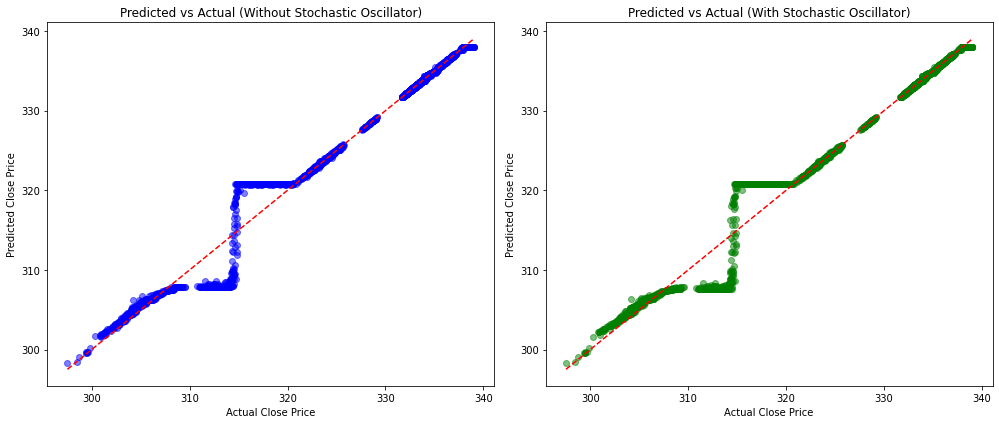

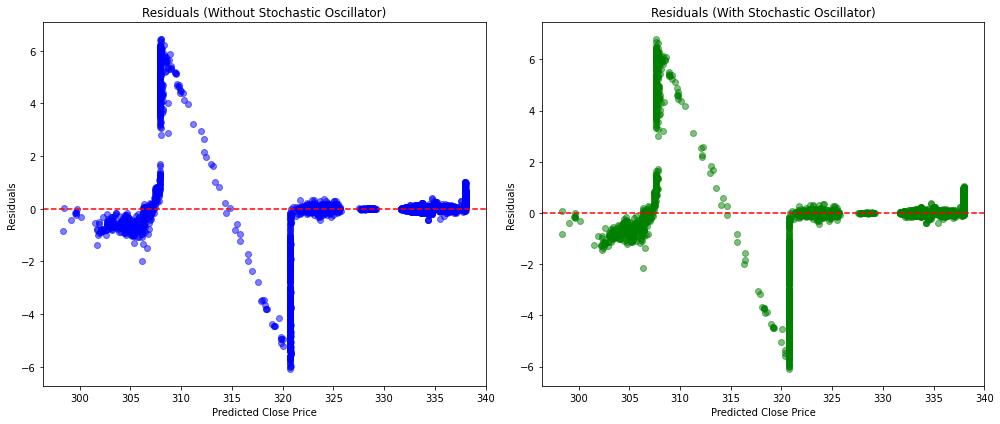

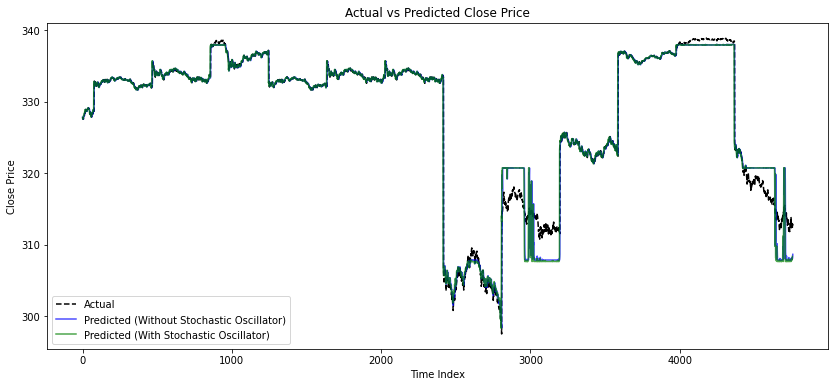

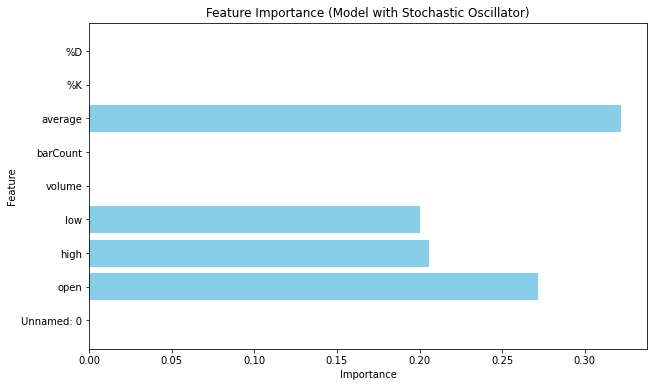

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load and clean the dataset
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Define features (X) and target variable (y) for the base model without indicators
X = data_cleaned.drop(columns=['close'])
y = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Random Forest Regressor without any indicators
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Calculate the Stochastic Oscillator
def calculate_stochastic_oscillator(df, k_window=14, d_window=3):
    high_rolling = df['high'].rolling(window=k_window).max()
    low_rolling = df['low'].rolling(window=k_window).min()
    df['%K'] = 100 * ((df['close'] - low_rolling) / (high_rolling - low_rolling))
    df['%D'] = df['%K'].rolling(window=d_window).mean()
    return df

data_cleaned = calculate_stochastic_oscillator(data_cleaned)
data_cleaned.dropna(inplace=True)

# Define features (X_with_stoch) and target variable (y_with_stoch)
X_with_stoch = data_cleaned.drop(columns=['close'])
y_with_stoch = data_cleaned['close']

# Split the data into training and testing sets
X_train_stoch, X_test_stoch, y_train_stoch, y_test_stoch = train_test_split(X_with_stoch, y_with_stoch, test_size=0.2, shuffle=False)

# Train the Random Forest Regressor with the Stochastic Oscillator
rfr_stoch = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_stoch.fit(X_train_stoch, y_train_stoch)
y_pred_stoch = rfr_stoch.predict(X_test_stoch)

# Calculate performance metrics for the model with Stochastic Oscillator
mse_stoch = mean_squared_error(y_test_stoch, y_pred_stoch)
r2_stoch = r2_score(y_test_stoch, y_pred_stoch)

print(f'Mean Squared Error with Stochastic Oscillator: {mse_stoch}')
print(f'R-squared with Stochastic Oscillator: {r2_stoch}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without Stochastic Oscillator
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without Stochastic Oscillator)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With Stochastic Oscillator
plt.subplot(1, 2, 2)
plt.scatter(y_test_stoch, y_pred_stoch, alpha=0.5, color='green')
plt.plot([y_test_stoch.min(), y_test_stoch.max()], [y_test_stoch.min(), y_test_stoch.max()], '--r')
plt.title('Predicted vs Actual (With Stochastic Oscillator)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without Stochastic Oscillator
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without Stochastic Oscillator)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With Stochastic Oscillator
plt.subplot(1, 2, 2)
plt.scatter(y_pred_stoch, y_test_stoch - y_pred_stoch, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With Stochastic Oscillator)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without Stochastic Oscillator)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_stoch)), y_pred_stoch, label='Predicted (With Stochastic Oscillator)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with Stochastic Oscillator
feature_importances = rfr_stoch.feature_importances_
features = X_with_stoch.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with Stochastic Oscillator)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


ADX

Mean Squared Error: 2.748609318948753
R-squared: 0.9735995052929562
Mean Squared Error with ADX: 3.6087349915063167
R-squared with ADX: 0.9653743026861626


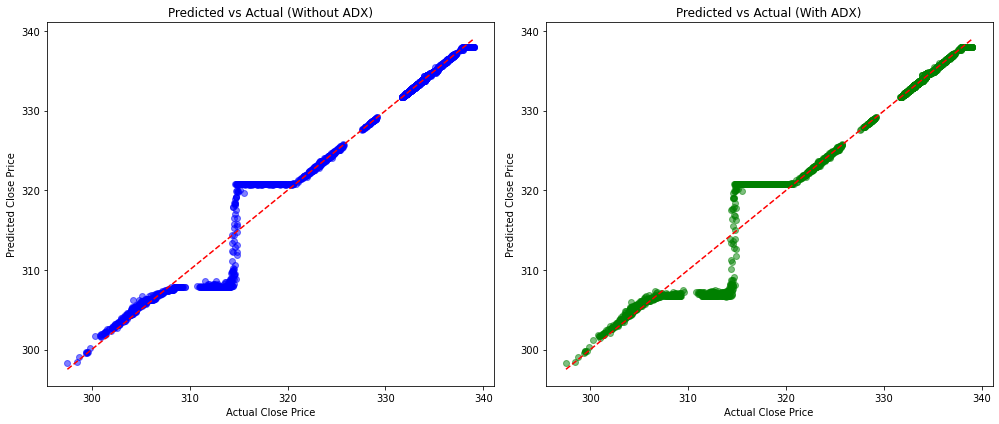

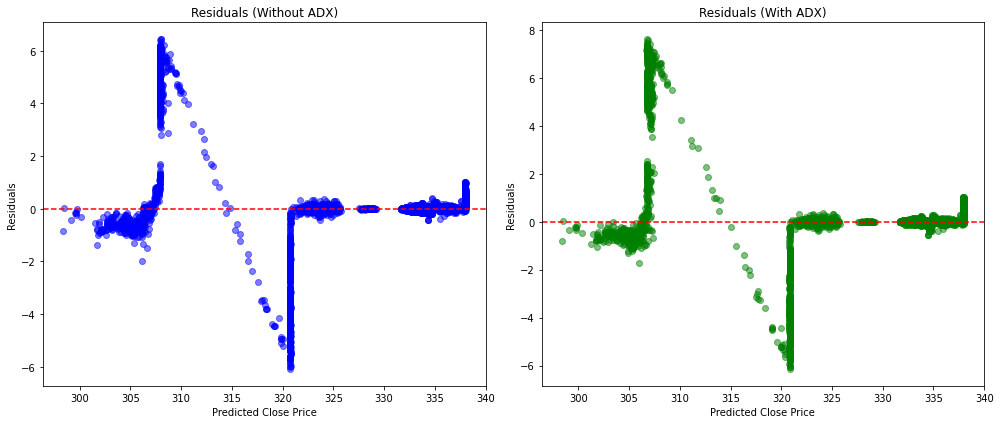

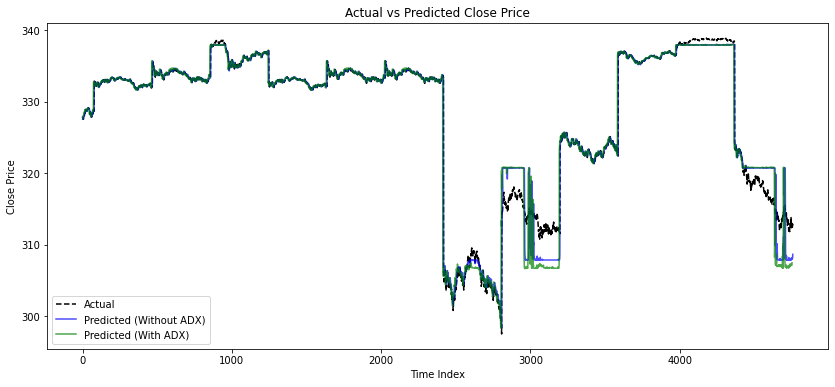

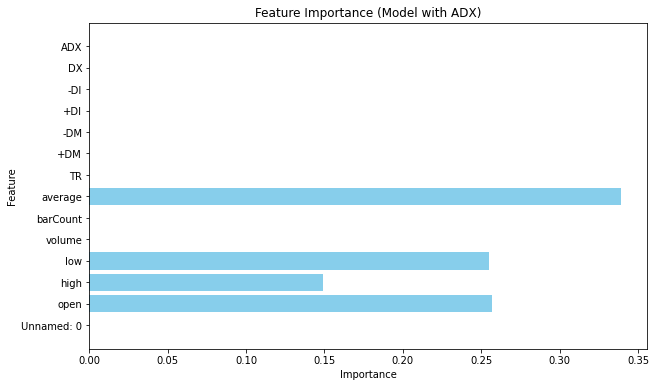

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load and clean the dataset
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Define features (X) and target variable (y) for the base model without indicators
X = data_cleaned.drop(columns=['close'])
y = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Random Forest Regressor without any indicators
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Calculate the ADX
def calculate_adx(df, n=14):
    df['TR'] = df[['high', 'low', 'close']].max(axis=1) - df[['high', 'low']].min(axis=1)
    df['+DM'] = np.where((df['high'] - df['high'].shift(1)) > (df['low'].shift(1) - df['low']), df['high'] - df['high'].shift(1), 0)
    df['+DM'] = np.where(df['+DM'] < 0, 0, df['+DM'])
    df['-DM'] = np.where((df['low'].shift(1) - df['low']) > (df['high'] - df['high'].shift(1)), df['low'].shift(1) - df['low'], 0)
    df['-DM'] = np.where(df['-DM'] < 0, 0, df['-DM'])
    df['TR'] = df['TR'].rolling(window=n).sum()
    df['+DM'] = df['+DM'].rolling(window=n).sum()
    df['-DM'] = df['-DM'].rolling(window=n).sum()
    df['+DI'] = 100 * (df['+DM'] / df['TR'])
    df['-DI'] = 100 * (df['-DM'] / df['TR'])
    df['DX'] = 100 * (np.abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI']))
    df['ADX'] = df['DX'].rolling(window=n).mean()
    return df

data_cleaned = calculate_adx(data_cleaned)
data_cleaned.dropna(inplace=True)

# Define features (X_with_adx) and target variable (y_with_adx)
X_with_adx = data_cleaned.drop(columns=['close'])
y_with_adx = data_cleaned['close']

# Split the data into training and testing sets
X_train_adx, X_test_adx, y_train_adx, y_test_adx = train_test_split(X_with_adx, y_with_adx, test_size=0.2, shuffle=False)

# Train the Random Forest Regressor with ADX
rfr_adx = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_adx.fit(X_train_adx, y_train_adx)
y_pred_adx = rfr_adx.predict(X_test_adx)

# Calculate performance metrics for the model with ADX
mse_adx = mean_squared_error(y_test_adx, y_pred_adx)
r2_adx = r2_score(y_test_adx, y_pred_adx)

print(f'Mean Squared Error with ADX: {mse_adx}')
print(f'R-squared with ADX: {r2_adx}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without ADX
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without ADX)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With ADX
plt.subplot(1, 2, 2)
plt.scatter(y_test_adx, y_pred_adx, alpha=0.5, color='green')
plt.plot([y_test_adx.min(), y_test_adx.max()], [y_test_adx.min(), y_test_adx.max()], '--r')
plt.title('Predicted vs Actual (With ADX)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without ADX
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without ADX)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With ADX
plt.subplot(1, 2, 2)
plt.scatter(y_pred_adx, y_test_adx - y_pred_adx, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With ADX)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without ADX)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_adx)), y_pred_adx, label='Predicted (With ADX)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with ADX
feature_importances = rfr_adx.feature_importances_
features = X_with_adx.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with ADX)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


CCI

Mean Squared Error: 2.748609318948753
R-squared: 0.9735995052929562
Mean Squared Error with CCI: 2.8802118846031712
R-squared with CCI: 0.9723528575700491


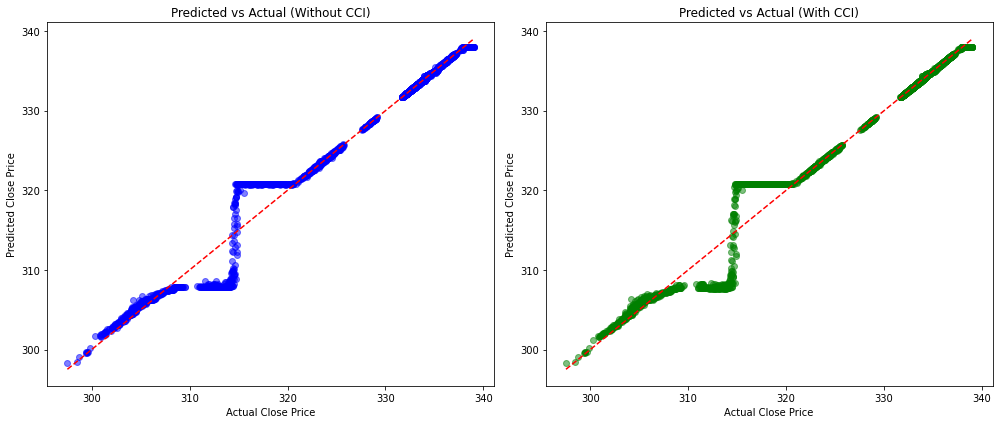

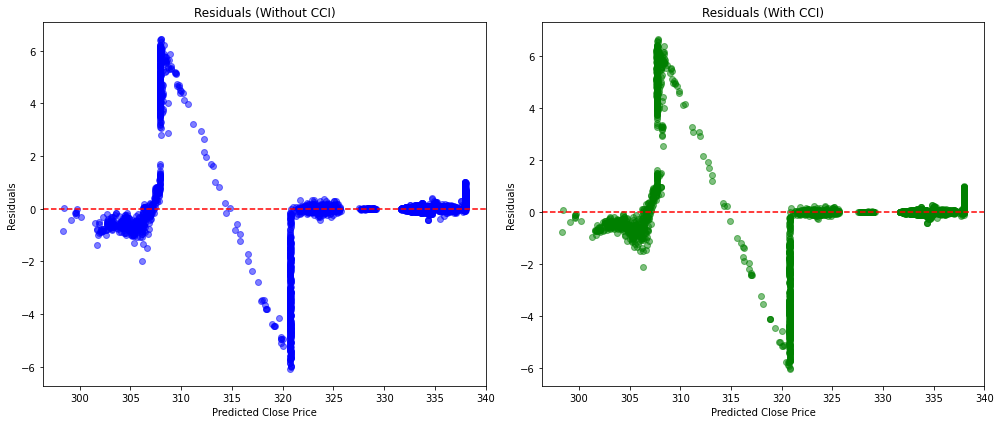

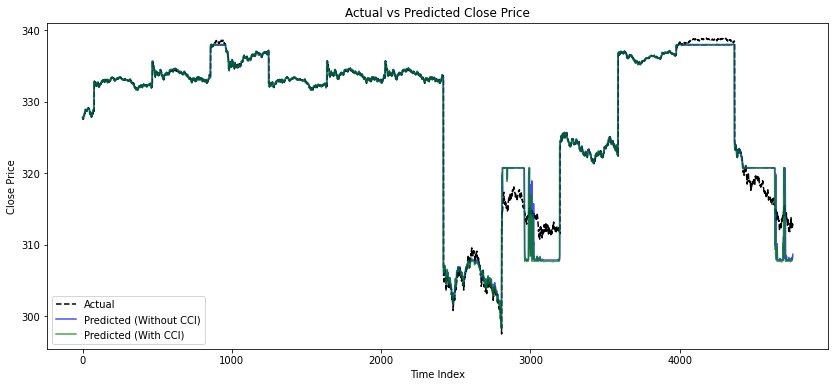

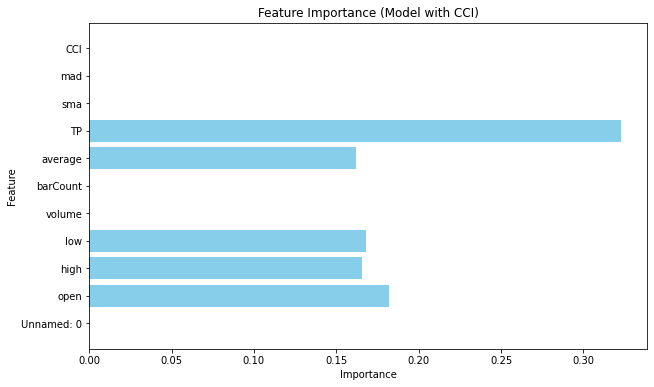

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load and clean the dataset
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Define features (X) and target variable (y) for the base model without indicators
X = data_cleaned.drop(columns=['close'])
y = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Random Forest Regressor without any indicators
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Calculate the Commodity Channel Index (CCI)
def calculate_cci(df, ndays=20):
    df['TP'] = (df['high'] + df['low'] + df['close']) / 3
    df['sma'] = df['TP'].rolling(window=ndays).mean()
    df['mad'] = df['TP'].rolling(window=ndays).apply(lambda x: np.mean(np.abs(x - np.mean(x))))
    df['CCI'] = (df['TP'] - df['sma']) / (0.015 * df['mad'])
    return df

data_cleaned = calculate_cci(data_cleaned)
data_cleaned.dropna(inplace=True)

# Define features (X_with_cci) and target variable (y_with_cci)
X_with_cci = data_cleaned.drop(columns=['close'])
y_with_cci = data_cleaned['close']

# Split the data into training and testing sets
X_train_cci, X_test_cci, y_train_cci, y_test_cci = train_test_split(X_with_cci, y_with_cci, test_size=0.2, shuffle=False)

# Train the Random Forest Regressor with CCI
rfr_cci = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_cci.fit(X_train_cci, y_train_cci)
y_pred_cci = rfr_cci.predict(X_test_cci)

# Calculate performance metrics for the model with CCI
mse_cci = mean_squared_error(y_test_cci, y_pred_cci)
r2_cci = r2_score(y_test_cci, y_pred_cci)

print(f'Mean Squared Error with CCI: {mse_cci}')
print(f'R-squared with CCI: {r2_cci}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without CCI
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without CCI)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With CCI
plt.subplot(1, 2, 2)
plt.scatter(y_test_cci, y_pred_cci, alpha=0.5, color='green')
plt.plot([y_test_cci.min(), y_test_cci.max()], [y_test_cci.min(), y_test_cci.max()], '--r')
plt.title('Predicted vs Actual (With CCI)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without CCI
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without CCI)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With CCI
plt.subplot(1, 2, 2)
plt.scatter(y_pred_cci, y_test_cci - y_pred_cci, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With CCI)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without CCI)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_cci)), y_pred_cci, label='Predicted (With CCI)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with CCI
feature_importances = rfr_cci.feature_importances_
features = X_with_cci.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with CCI)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


OBV

Mean Squared Error: 2.748609318948753
R-squared: 0.9735995052929562
Mean Squared Error with OBV: 3.024713150134137
R-squared with OBV: 0.9709475177283532


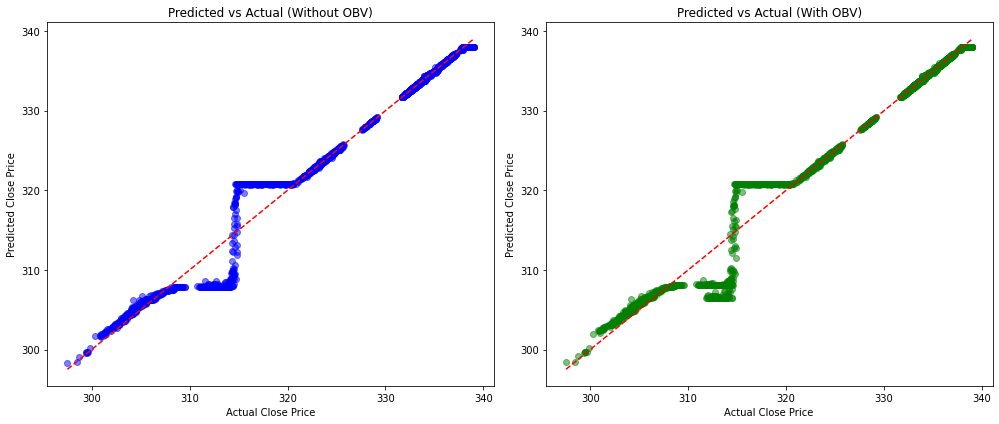

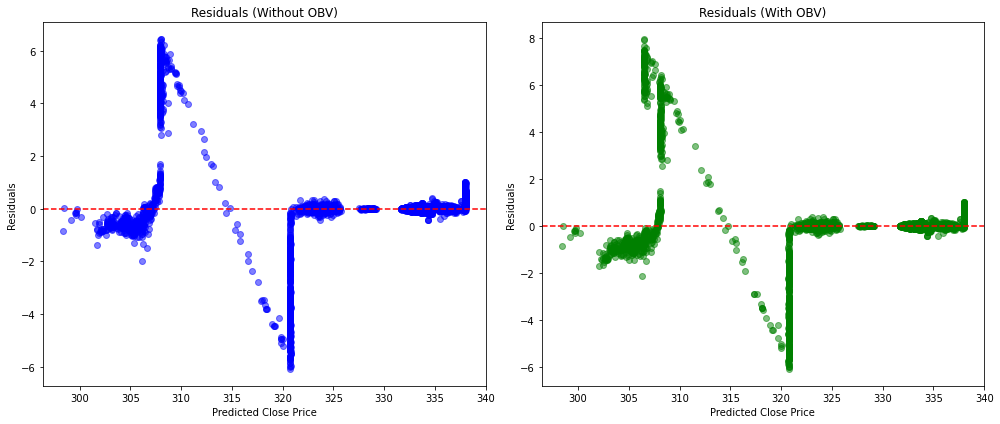

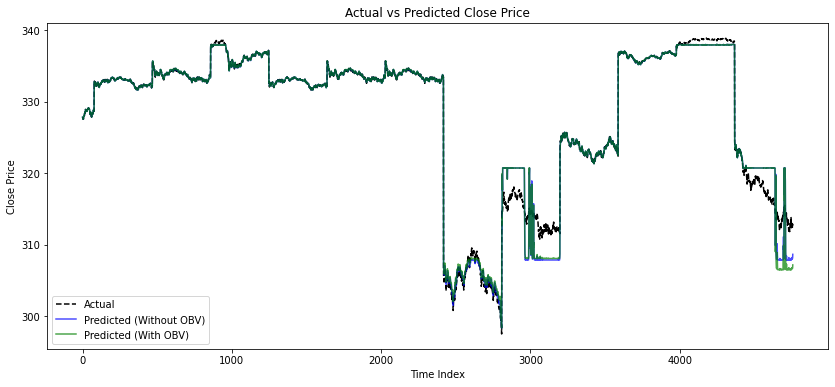

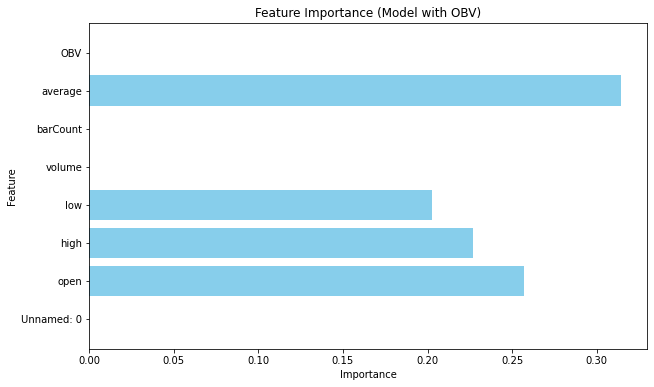

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load and clean the dataset
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Define features (X) and target variable (y) for the base model without indicators
X = data_cleaned.drop(columns=['close'])
y = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Random Forest Regressor without any indicators
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Calculate the On-Balance Volume (OBV)
def calculate_obv(df):
    obv = [0]
    for i in range(1, len(df)):
        if df['close'][i] > df['close'][i-1]:
            obv.append(obv[-1] + df['volume'][i])
        elif df['close'][i] < df['close'][i-1]:
            obv.append(obv[-1] - df['volume'][i])
        else:
            obv.append(obv[-1])
    df['OBV'] = obv
    return df

data_cleaned = calculate_obv(data_cleaned)
data_cleaned.dropna(inplace=True)

# Define features (X_with_obv) and target variable (y_with_obv)
X_with_obv = data_cleaned.drop(columns=['close'])
y_with_obv = data_cleaned['close']

# Split the data into training and testing sets
X_train_obv, X_test_obv, y_train_obv, y_test_obv = train_test_split(X_with_obv, y_with_obv, test_size=0.2, shuffle=False)

# Train the Random Forest Regressor with OBV
rfr_obv = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_obv.fit(X_train_obv, y_train_obv)
y_pred_obv = rfr_obv.predict(X_test_obv)

# Calculate performance metrics for the model with OBV
mse_obv = mean_squared_error(y_test_obv, y_pred_obv)
r2_obv = r2_score(y_test_obv, y_pred_obv)

print(f'Mean Squared Error with OBV: {mse_obv}')
print(f'R-squared with OBV: {r2_obv}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without OBV
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without OBV)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With OBV
plt.subplot(1, 2, 2)
plt.scatter(y_test_obv, y_pred_obv, alpha=0.5, color='green')
plt.plot([y_test_obv.min(), y_test_obv.max()], [y_test_obv.min(), y_test_obv.max()], '--r')
plt.title('Predicted vs Actual (With OBV)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without OBV
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without OBV)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With OBV
plt.subplot(1, 2, 2)
plt.scatter(y_pred_obv, y_test_obv - y_pred_obv, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With OBV)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without OBV)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_obv)), y_pred_obv, label='Predicted (With OBV)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with OBV
feature_importances = rfr_obv.feature_importances_
features = X_with_obv.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with OBV)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Fibbonacci Retracement

Mean Squared Error: 2.748609318948753
R-squared: 0.9735995052929562
Mean Squared Error with Fibonacci Retracement: 2.607351334624277
R-squared with Fibonacci Retracement: 0.9749720449045325


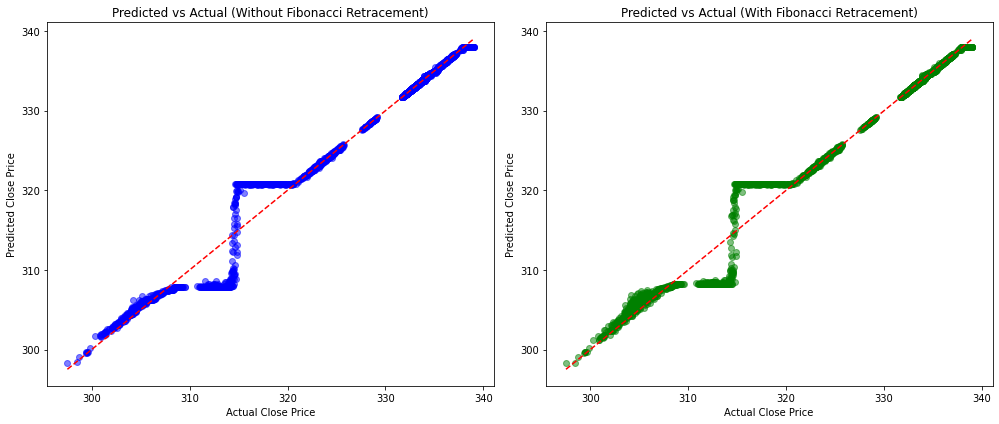

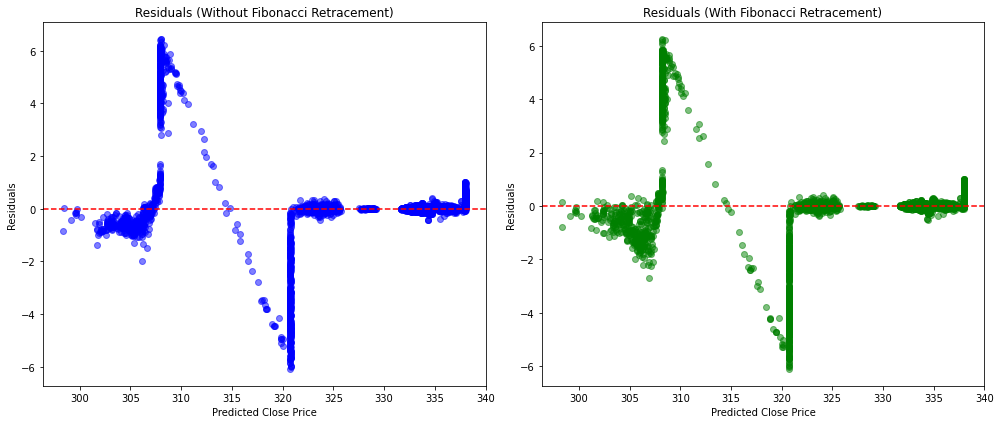

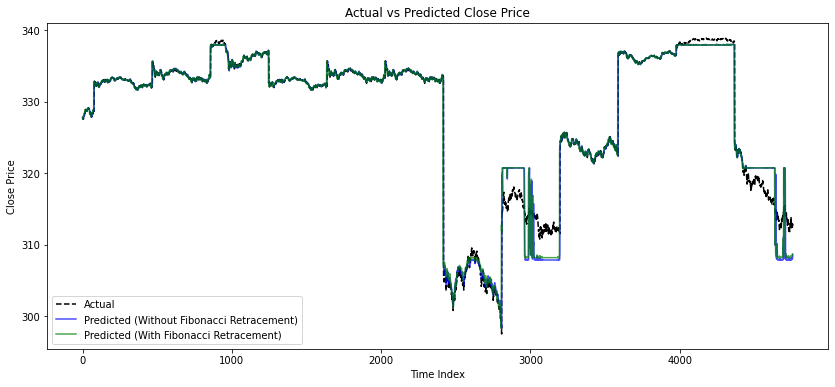

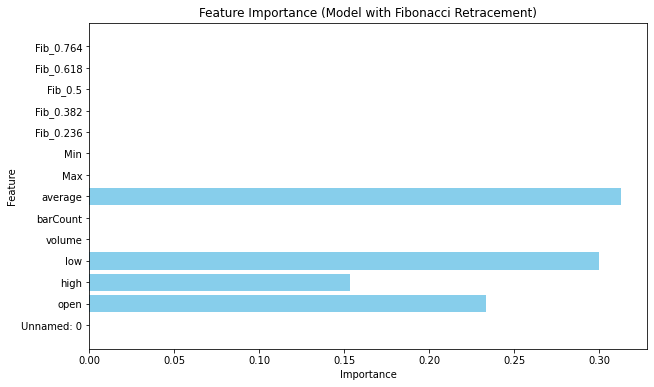

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load and clean the dataset
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Define features (X) and target variable (y) for the base model without indicators
X = data_cleaned.drop(columns=['close'])
y = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Random Forest Regressor without any indicators
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Calculate Fibonacci Retracement levels
def calculate_fibonacci_retracement(df, period=20):
    df['Max'] = df['high'].rolling(window=period).max()
    df['Min'] = df['low'].rolling(window=period).min()
    
    # Fibonacci levels
    df['Fib_0.236'] = df['Max'] - 0.236 * (df['Max'] - df['Min'])
    df['Fib_0.382'] = df['Max'] - 0.382 * (df['Max'] - df['Min'])
    df['Fib_0.5'] = df['Max'] - 0.5 * (df['Max'] - df['Min'])
    df['Fib_0.618'] = df['Max'] - 0.618 * (df['Max'] - df['Min'])
    df['Fib_0.764'] = df['Max'] - 0.764 * (df['Max'] - df['Min'])
    
    return df

data_cleaned = calculate_fibonacci_retracement(data_cleaned)
data_cleaned.dropna(inplace=True)

# Define features (X_with_fib) and target variable (y_with_fib)
X_with_fib = data_cleaned.drop(columns=['close'])
y_with_fib = data_cleaned['close']

# Split the data into training and testing sets
X_train_fib, X_test_fib, y_train_fib, y_test_fib = train_test_split(X_with_fib, y_with_fib, test_size=0.2, shuffle=False)

# Train the Random Forest Regressor with Fibonacci Retracement levels
rfr_fib = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_fib.fit(X_train_fib, y_train_fib)
y_pred_fib = rfr_fib.predict(X_test_fib)

# Calculate performance metrics for the model with Fibonacci Retracement levels
mse_fib = mean_squared_error(y_test_fib, y_pred_fib)
r2_fib = r2_score(y_test_fib, y_pred_fib)

print(f'Mean Squared Error with Fibonacci Retracement: {mse_fib}')
print(f'R-squared with Fibonacci Retracement: {r2_fib}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without Fibonacci Retracement
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without Fibonacci Retracement)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With Fibonacci Retracement
plt.subplot(1, 2, 2)
plt.scatter(y_test_fib, y_pred_fib, alpha=0.5, color='green')
plt.plot([y_test_fib.min(), y_test_fib.max()], [y_test_fib.min(), y_test_fib.max()], '--r')
plt.title('Predicted vs Actual (With Fibonacci Retracement)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without Fibonacci Retracement
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without Fibonacci Retracement)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With Fibonacci Retracement
plt.subplot(1, 2, 2)
plt.scatter(y_pred_fib, y_test_fib - y_pred_fib, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With Fibonacci Retracement)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without Fibonacci Retracement)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_fib)), y_pred_fib, label='Predicted (With Fibonacci Retracement)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with Fibonacci Retracement
feature_importances = rfr_fib.feature_importances_
features = X_with_fib.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with Fibonacci Retracement)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Compare all RFR Models, Cross validation and Statistical Testing for all 10 RFR models

      Technical Indicator       MSE  R-squared
0                    None  2.748609   0.973600
1                     SMA  2.698094   0.974096
2                     EMA  2.604659   0.974982
3                    MACD  3.160733   0.969641
4                     RSI  2.852709   0.972600
5         Bollinger Bands  2.710281   0.973984
6   Stochastic Oscillator  2.923060   0.971942
7                     ADX  3.608735   0.965374
8                     CCI  2.880212   0.972353
9                     OBV  3.024713   0.970948
10  Fibonacci Retracement  2.607351   0.974972


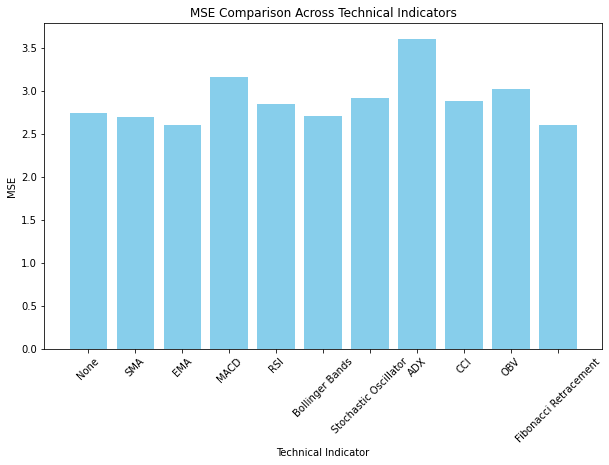

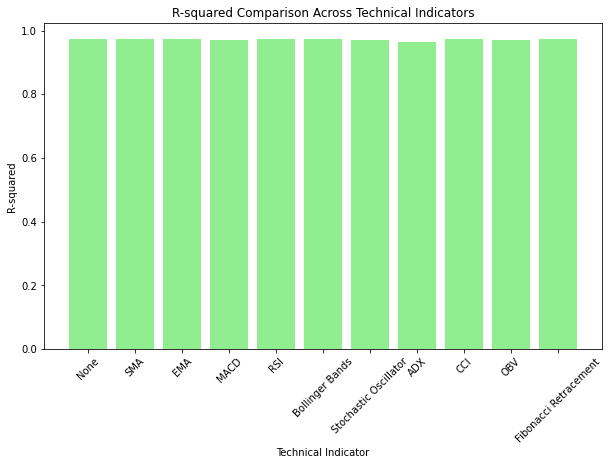

     Technical Indicator  t-statistic   p-value
0                    SMA     1.073593  0.343456
1                    EMA     0.978420  0.383266
2                   MACD    -1.019301  0.365694
3                    RSI    -1.040127  0.357017
4        Bollinger Bands     0.213295  0.841527
5  Stochastic Oscillator    -1.016821  0.366740
6                    ADX    -0.996721  0.375311
7                    CCI    -0.933055  0.403612
8                    OBV    -1.047524  0.353979
9  Fibonacci Retracement     0.809084  0.463844


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from sklearn.model_selection import cross_val_score

# Assuming these are the metrics you calculated earlier for each model
results = {
    'Technical Indicator': ['None', 'SMA', 'EMA', 'MACD', 'RSI', 'Bollinger Bands', 'Stochastic Oscillator', 'ADX', 'CCI', 'OBV', 'Fibonacci Retracement'],
    'MSE': [mse, mse_sma, mse_ema, mse_macd, mse_rsi, mse_bbands, mse_stoch, mse_adx, mse_cci, mse_obv, mse_fib],
    'R-squared': [r2, r2_sma, r2_ema, r2_macd, r2_rsi, r2_bbands, r2_stoch, r2_adx, r2_cci, r2_obv, r2_fib]
}

results_df = pd.DataFrame(results)
print(results_df)

# Plotting MSE comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Technical Indicator'], results_df['MSE'], color='skyblue')
plt.title('MSE Comparison Across Technical Indicators')
plt.xlabel('Technical Indicator')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()

# Plotting R-squared comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Technical Indicator'], results_df['R-squared'], color='lightgreen')
plt.title('R-squared Comparison Across Technical Indicators')
plt.xlabel('Technical Indicator')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.show()

# Perform paired t-tests for each indicator comparing the MSE from the models with and without the indicator
t_test_results = []

# List of indicators and their respective feature sets
indicators = ['SMA', 'EMA', 'MACD', 'RSI', 'Bollinger Bands', 'Stochastic Oscillator', 'ADX', 'CCI', 'OBV', 'Fibonacci Retracement']
models_with_indicators = [rfr_sma, rfr_ema, rfr_macd, rfr_rsi, rfr_bbands, rfr_stoch, rfr_adx, rfr_cci, rfr_obv, rfr_fib]
X_with_indicators = [X_with_sma, X_with_ema, X_with_macd, X_with_rsi, X_with_bbands, X_with_stoch, X_with_adx, X_with_cci, X_with_obv, X_with_fib]
y_with_indicators = [y_with_sma, y_with_ema, y_with_macd, y_with_rsi, y_with_bbands, y_with_stoch, y_with_adx, y_with_cci, y_with_obv, y_with_fib]

# Perform cross-validation and paired t-test for each indicator
for indicator, model_with_indicator, X_with_indicator, y_with_indicator in zip(indicators, models_with_indicators, X_with_indicators, y_with_indicators):
    # Cross-validation without the indicator
    cv_mse_without_indicator = cross_val_score(rfr, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_mse_without_indicator = -cv_mse_without_indicator

    # Cross-validation with the indicator
    cv_mse_with_indicator = cross_val_score(model_with_indicator, X_with_indicator, y_with_indicator, cv=5, scoring='neg_mean_squared_error')
    cv_mse_with_indicator = -cv_mse_with_indicator

    # Perform paired t-test
    t_stat, p_value = ttest_rel(cv_mse_without_indicator, cv_mse_with_indicator)
    
    # Append results to the list
    t_test_results.append({
        'Technical Indicator': indicator,
        't-statistic': t_stat,
        'p-value': p_value
    })

# Convert results to DataFrame
t_test_results_df = pd.DataFrame(t_test_results)

# Display the results
print(t_test_results_df)


Interpreting the Results:
t-statistic: This value indicates the direction and magnitude of the difference between the models with and without the indicator. A positive t-statistic suggests that the model with the indicator performed better (higher MSE), while a negative t-statistic suggests that the model without the indicator performed better.
p-value: The p-value tells you whether the observed difference in MSE between the models is statistically significant. Typically, a p-value less than 0.05 is considered significant.

SMA, EMA, MACD, RSI, Bollinger Bands, Stochastic Oscillator, ADX, CCI, OBV, and Fibonacci Retracement:

1. p-values: All the p-values are above 0.05, which means that none of the technical indicators significantly improved the model's performance compared to the baseline model (without indicators).
2. t-statistics: The t-statistics are relatively close to zero, suggesting minimal differences in performance between models with and without these indicators.